In [1]:
import csv
import pandas as pd
import numpy as np
import os

## Merging dataframes

In [2]:
df_nis = pd.read_csv('data_NIS.csv')
print(df_nis.shape)
df_nis.head(10)

(160002, 4)


,run,timestamp,class_id,Number_in_System
0,1.0,0.000000,0.0,0.0
1,1.0,0.000000,1.0,0.0
2,1.0,1.009945,1.0,1.0
3,1.0,1.009945,0.0,0.0
4,1.0,1.263638,0.0,0.0
5,1.0,1.263638,1.0,0.0
6,1.0,2.160614,0.0,0.0
7,1.0,2.160614,1.0,1.0
8,1.0,2.608597,0.0,0.0
9,1.0,2.608597,1.0,0.0


In [3]:
len(df_nis['timestamp'].unique())

80001

In [4]:
df_nis_separated = pd.DataFrame(columns=['timestamp', 'NIS_consult', 'NIS_no_consult'])  # 0 = consult, 1 = no consult
df_nis_separated

,timestamp,NIS_consult,NIS_no_consult


In [5]:
for i, t in enumerate(df_nis['timestamp'].unique()):
    if i % 2000 == 0:
        print(i)
    nis_consult = df_nis.loc[(df_nis['timestamp'] == t) & (df_nis['class_id'] == 0.0), 'Number_in_System'].iloc[0]
    nis_no_consult = df_nis.loc[(df_nis['timestamp'] == t) & (df_nis['class_id'] == 1.0), 'Number_in_System'].iloc[0]
    df_nis_separated.loc[i] = t, nis_consult, nis_no_consult
print(len(df_nis_separated))
print(df_nis_separated.head())

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
80001
   timestamp  NIS_consult  NIS_no_consult
0   0.000000          0.0             0.0
1   1.009945          0.0             1.0
2   1.263638          0.0             0.0
3   2.160614          0.0             1.0
4   2.608597          0.0             0.0


In [6]:
df_nis_separated.head(20)

,timestamp,NIS_consult,NIS_no_consult
0,0.000000,0.0,0.0
1,1.009945,0.0,1.0
2,1.263638,0.0,0.0
3,2.160614,0.0,1.0
4,2.608597,0.0,0.0
5,2.653815,0.0,1.0
6,3.522926,0.0,2.0
7,4.546470,1.0,2.0
8,4.901508,1.0,1.0
9,5.320448,2.0,1.0


In [7]:
df_wiq_tis = pd.read_csv('data_WIQ_TIS.csv')
print(df_wiq_tis.shape)
df_wiq_tis = df_wiq_tis[df_wiq_tis['event_type'] == 'd']
print(df_wiq_tis.shape)
df_wiq_tis.head()

(80000, 7)
(40000, 7)


,id_run,arrival_time,timestamp,event_type,C,A,elapsed
0,0_0,1.009945,1.263638,d,1,0,0.253693
1,1_0,2.160614,2.608597,d,1,0,0.447983
2,2_0,2.653815,4.901508,d,1,0,2.247693
3,3_0,3.522926,5.556008,d,1,0,2.033082
4,4_0,4.546470,6.800055,d,0,0,2.253586


In [8]:
new_df = pd.merge(df_nis_separated, df_wiq_tis,  how='inner', left_on=['timestamp'], right_on = ['arrival_time'])
print(new_df.shape)
new_df.head()

(40000, 10)


,timestamp_x,NIS_consult,NIS_no_consult,id_run,arrival_time,timestamp_y,event_type,C,A,elapsed
0,1.009945,0.0,1.0,0_0,1.009945,1.263638,d,1,0,0.253693
1,2.160614,0.0,1.0,1_0,2.160614,2.608597,d,1,0,0.447983
2,2.653815,0.0,1.0,2_0,2.653815,4.901508,d,1,0,2.247693
3,3.522926,0.0,2.0,3_0,3.522926,5.556008,d,1,0,2.033082
4,4.546470,1.0,2.0,4_0,4.546470,6.800055,d,0,0,2.253586


In [9]:
new_df = new_df[['arrival_time', 'C', 'NIS_consult', 'NIS_no_consult', 'elapsed']]
new_df.columns = ['arrival_time', 'Type_No_Consult', 'NIS_consult', 'NIS_no_consult', 'LOS']
new_df

,arrival_time,Type_No_Consult,NIS_consult,NIS_no_consult,LOS
0,1.009945,1,0.0,1.0,0.253693
1,2.160614,1,0.0,1.0,0.447983
2,2.653815,1,0.0,1.0,2.247693
3,3.522926,1,0.0,2.0,2.033082
4,4.546470,0,1.0,2.0,2.253586
...,...,...,...,...,...
39995,44498.968327,1,0.0,5.0,6.855732
39996,44499.227551,1,0.0,6.0,10.480218
39997,44499.550381,1,0.0,7.0,10.846060
39998,44500.187678,1,0.0,7.0,10.893223


In [10]:
df_test = new_df[75:]
df_test.head()

,arrival_time,Type_No_Consult,NIS_consult,NIS_no_consult,LOS
75,84.233729,1,0.0,2.0,4.208967
76,84.497065,1,0.0,3.0,4.119121
77,87.490464,1,0.0,3.0,2.089174
78,87.558266,1,0.0,4.0,2.219138
79,88.914941,1,0.0,3.0,0.954941


In [11]:
x_test = df_test[['Type_No_Consult', 'NIS_consult', 'NIS_no_consult']]
y_test = df_test[['LOS']]

In [12]:
x_test.head()

,Type_No_Consult,NIS_consult,NIS_no_consult
75,1,0.0,2.0
76,1,0.0,3.0
77,1,0.0,3.0
78,1,0.0,4.0
79,1,0.0,3.0


In [13]:
y_test.head()

,LOS
75,4.208967
76,4.119121
77,2.089174
78,2.219138
79,0.954941


In [14]:
new_df.to_csv('MM1_baseline_separate_nis.csv', index=False)

In [15]:
np.mean(new_df['LOS'])

20.091031206481784

## Naive calculation

In [16]:
def naive_calculations(df, cutdown):
    los_list = []
    for j in range(len(df)):
        if df['Type_No_Consult'][j] == 0:  # consult patient
            los_list.append(df['LOS'][j] * cutdown)
        else:
            los_list.append(df['LOS'][j])

    mean = round(np.mean(los_list), 2)
    median = round(np.median(los_list), 2)
    stdev = round(np.std(los_list), 2)
    P90 = round(np.percentile(los_list, q=90), 2)

    return mean, median, stdev, P90

In [17]:
new_df

,arrival_time,Type_No_Consult,NIS_consult,NIS_no_consult,LOS
0,1.009945,1,0.0,1.0,0.253693
1,2.160614,1,0.0,1.0,0.447983
2,2.653815,1,0.0,1.0,2.247693
3,3.522926,1,0.0,2.0,2.033082
4,4.546470,0,1.0,2.0,2.253586
...,...,...,...,...,...
39995,44498.968327,1,0.0,5.0,6.855732
39996,44499.227551,1,0.0,6.0,10.480218
39997,44499.550381,1,0.0,7.0,10.846060
39998,44500.187678,1,0.0,7.0,10.893223


In [18]:
# Training data
df_train = new_df[20000:30000].reset_index(drop=True)
# df_test = new_df[30000:].reset_index(drop=True)

df = df_train.copy()
# df = df_test.copy()

nPatients = len(df)
nConsultPatients = len(df[df['Type_No_Consult'] == 0])
percentConsult = round(nConsultPatients / nPatients * 100, 1)

df_results = pd.DataFrame(
    columns=['nPatients', 'nConsultPatients', 'percentConsult', 'Cut Down by (%)', 'Mean', 'Median',
             'Stdev', '90th Percentile'])

# cutdown_percentage = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cutdown_percentage = [0.5, 1.0]
for i, cutdown in enumerate(cutdown_percentage):
    print("Consult Patients shorten by {} Percent".format((1-cutdown)*100))
    mean, median, stdev, P90 = naive_calculations(df, cutdown)
    df_results.loc[i] = nPatients, nConsultPatients, percentConsult, (
                1 - cutdown) * 100, mean, median, stdev, P90

print(df_results)

save_path_results = os.path.join(os.getcwd(), "Consult_Reduction_Results_Naive_MM1_train.csv")
df_results.to_csv(save_path_results, index=False, header=True)

Consult Patients shorten by 50.0 Percent
Consult Patients shorten by 0.0 Percent
   nPatients  nConsultPatients  percentConsult  Cut Down by (%)   Mean  \
0    10000.0             961.0             9.6             50.0  15.76   
1    10000.0             961.0             9.6              0.0  16.57   

   Median  Stdev  90th Percentile  
0   11.71  13.40             35.4  
1   12.71  13.68             36.8  


# M/M/1 (40000 samples generated from M/M/1 simulator) - 1 general nis

In [19]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np

In [20]:
def open_list_of_csv(csv_list):
    los_list = [[],[],[],[],[]]
    for i, filename in enumerate(csv_list):
        print(filename)
        with open(filename, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                los_list[i].append(float(row[0]))
    return los_list

In [21]:
def plot_los_distributions(los_list, title, x_lim):
    figure(figsize=(8, 6), dpi=80)
    sns.set_color_codes("colorblind")
    sns.histplot(los_list[0], bins='auto', element="step", label='Actual LOS', color='b', alpha=0.2)
    sns.histplot(los_list[1], bins='auto', element="step", label='Simulated LOS', color='g', alpha=0.2)

    plt.legend()
    plt.title('Actual vs. Simulated LOS Distribution ({})'.format(title))
    plt.ylabel('Frequency')
    plt.xlim(0, x_lim)
    plt.show

In [22]:
# plt.hist(los_list[0], bins = 50)

# Out of Sample Test: Train on samples 10k-30k, Test on samples 30k-40k

In [23]:
ofs_csv_list = ['LOS_Dist_Actual_MM1 - train10-30k test30-40k.csv', 'LOS_Dist_Simulated_MM1 - train10k-30k test30k-40k (1run).csv']

In [24]:
ofs_los_list = open_list_of_csv(ofs_csv_list)

LOS_Dist_Actual_MM1 - train10-30k test30-40k.csv
LOS_Dist_Simulated_MM1 - train10k-30k test30k-40k (1run).csv


In [25]:
len(ofs_los_list[0]), len(ofs_los_list[1])

(10000, 10000)

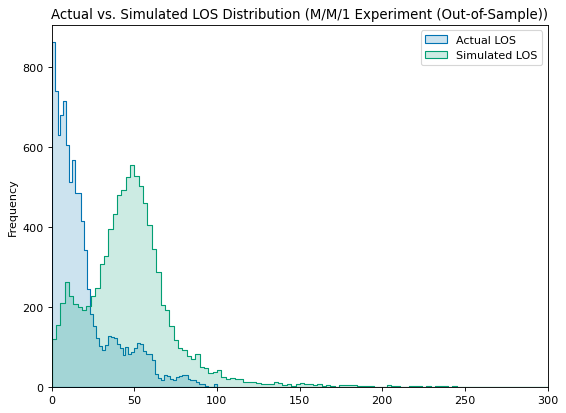

In [26]:
plot_los_distributions(ofs_los_list, 'M/M/1 Experiment (Out-of-Sample)', 300)

In [27]:
print('actual mean los (1 run)', np.mean(ofs_los_list[0])) 
print('simulated mean los (1 run)', np.mean(ofs_los_list[1]))

actual mean los (1 run) 19.547403590587972
simulated mean los (1 run) 48.66859994360468


# In Sample Test: Train on samples 10k-30k, Test on samples 20k-30k

In [28]:
is_csv_list = ['LOS_Dist_Actual_MM1 - train10k-30k test20k-30k.csv', 'LOS_Dist_Simulated_MM1 - train10k-30k test20k-30k (1run).csv']

In [29]:
is_los_list = open_list_of_csv(is_csv_list)

LOS_Dist_Actual_MM1 - train10k-30k test20k-30k.csv
LOS_Dist_Simulated_MM1 - train10k-30k test20k-30k (1run).csv


In [30]:
len(is_los_list[0]), len(is_los_list[1])

(10000, 10000)

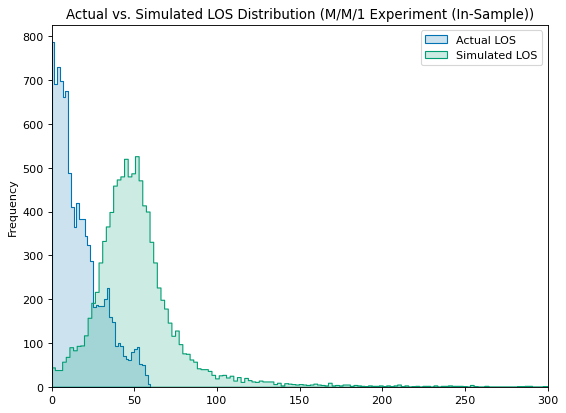

In [31]:
plot_los_distributions(is_los_list, 'M/M/1 Experiment (In-Sample)', 300)

In [32]:
print('actual mean los (1 run)', np.mean(is_los_list[0])) 
print('simulated mean los (1 run)', np.mean(is_los_list[1]))

actual mean los (1 run) 16.57360031083062
simulated mean los (1 run) 52.39052384390484
